# Reading the data

In [21]:
import pandas as pd 

# Reading the csv file 
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
df["y"].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

# Defining input and target

In [23]:
X = df.drop(columns=["y"], axis=1)
y = df["y"].map({"no":0, "yes":1})

# Processing the input variables

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding categorical features
cat_cols = X.select_dtypes(include="object").columns

# Defining the encoder
ord_encoder = OrdinalEncoder()
X[cat_cols] = ord_encoder.fit_transform(X[cat_cols])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0


# Build a Random Forest

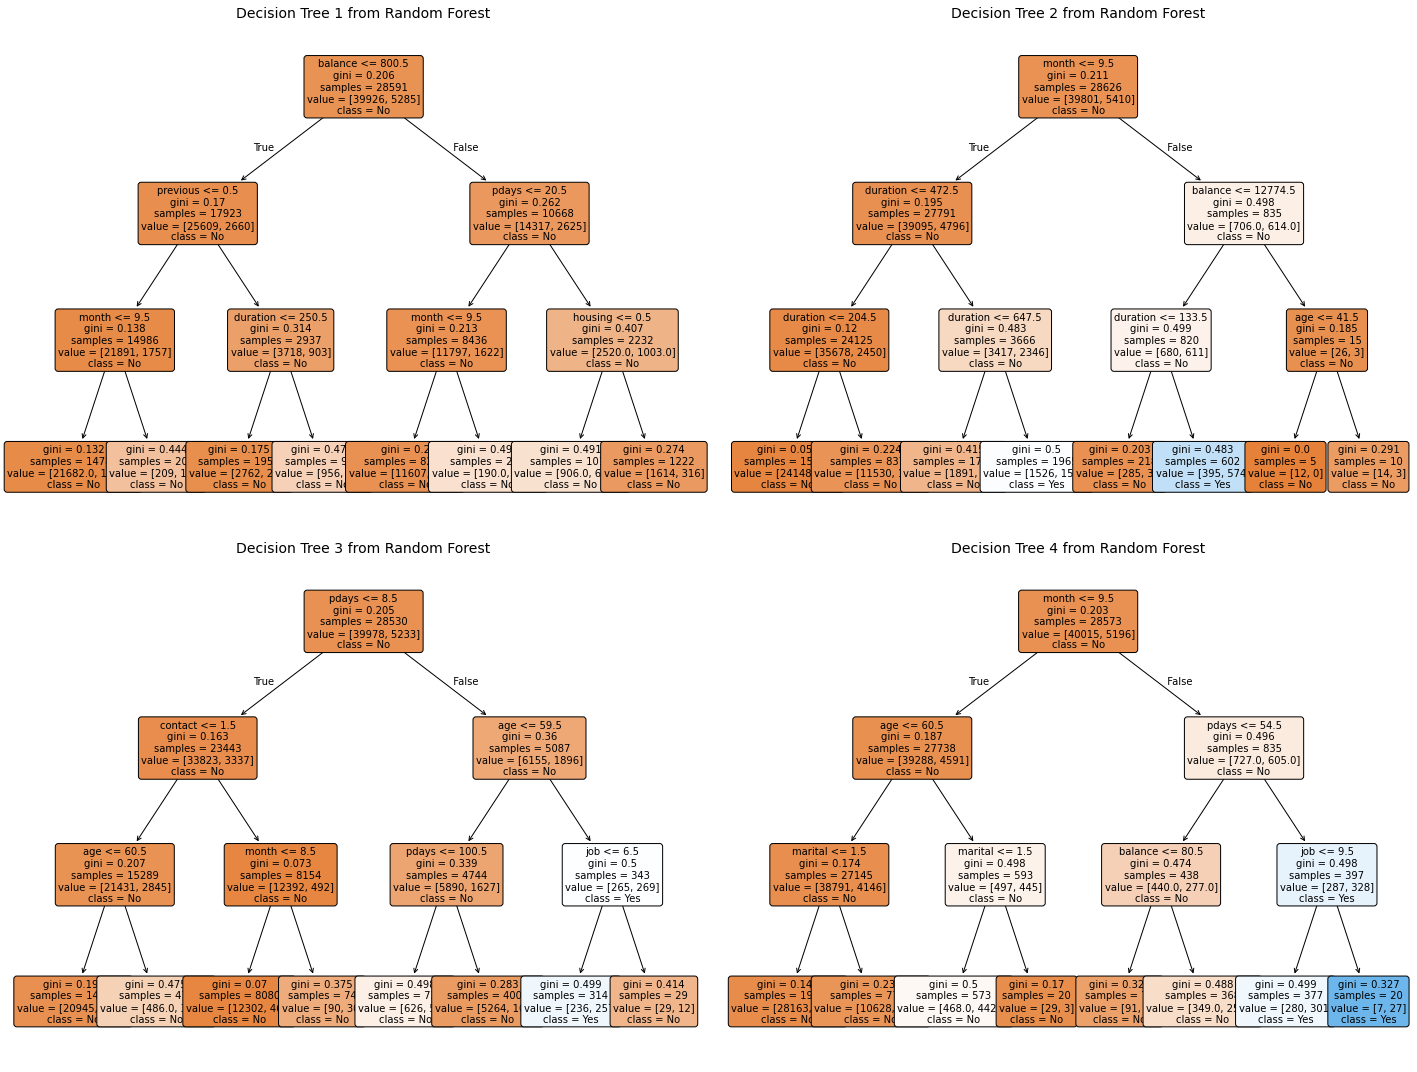

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Defining the model 
RF_md = RandomForestClassifier(n_estimators=4, max_depth=3, random_state=42)

# Fitting the model
RF_md.fit(X, y)

plt.figure(figsize=(20,15))

# Visualizing the trees in the Random Forest
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_tree(RF_md.estimators_[i], 
              feature_names=X.columns, 
              class_names=["No", "Yes"], 
              filled=True, 
              rounded=True, 
              fontsize=10)
    plt.title(f"Decision Tree {i+1} from Random Forest", fontsize=14)

plt.tight_layout()
plt.show();

# Feature Importance

In [30]:
# Feature Importance DataFrame
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF_md.feature_importances_}).sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
11,duration,0.265115
13,pdays,0.201667
10,month,0.200827
0,age,0.163054
6,housing,0.041609
14,previous,0.037774
8,contact,0.033844
5,balance,0.030614
2,marital,0.022380
1,job,0.003117


# Running 5-fold cross-validation

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Defining the model 
RF_md = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Defining the cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model using cross-validation
RF_cv = cross_val_score(RF_md, X, y, cv=skf, scoring="roc_auc", n_jobs=-1)

print(f"Random Forest CV ROC AUC: {RF_cv.mean():.4f} ± {RF_cv.std():.4f}")

Random Forest CV ROC AUC: 0.8824 ± 0.0045


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Defining the model 
RF_md = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Defining the cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model using cross-validation
RF_cv = cross_val_score(RF_md, X, y, cv=skf, scoring="roc_auc", n_jobs=-1)

print(f"Random Forest CV ROC AUC: {RF_cv.mean():.4f} ± {RF_cv.std():.4f}")

Random Forest CV ROC AUC: 0.9013 ± 0.0037


In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Defining the model 
RF_md = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

# Defining the cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model using cross-validation
RF_cv = cross_val_score(RF_md, X, y, cv=skf, scoring="roc_auc", n_jobs=-1)

print(f"Random Forest CV ROC AUC: {RF_cv.mean():.4f} ± {RF_cv.std():.4f}")

Random Forest CV ROC AUC: 0.9126 ± 0.0027
